# PREDICATING RISK OF DIABETES AT EARLY STAGES

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve,roc_auc_score
from sklearn import tree, model_selection, svm


from sklearn.naive_bayes import GaussianNB


In [83]:
dia_df=pd.read_csv("C:/Users/apratim sadhu/Desktop/diabetes/diabetes_data_upload.csv")

In [84]:
dia_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [85]:
for i in dia_df.columns:
    if dia_df[i].dtype=='object':
        lbl=LabelEncoder()
        lbl.fit(list(dia_df[i].values))
        dia_df[i]=lbl.transform(list(dia_df[i].values))

In [86]:
dia_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [87]:
dia_df.tail(20)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
500,66,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
501,67,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
502,70,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
503,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
504,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
505,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
506,61,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
507,60,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
508,58,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0
509,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
dia_df['class'].count

<bound method Series.count of 0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64>

In [89]:
dia_df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [90]:
dia_df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [91]:
corrdata=dia_df.corr()

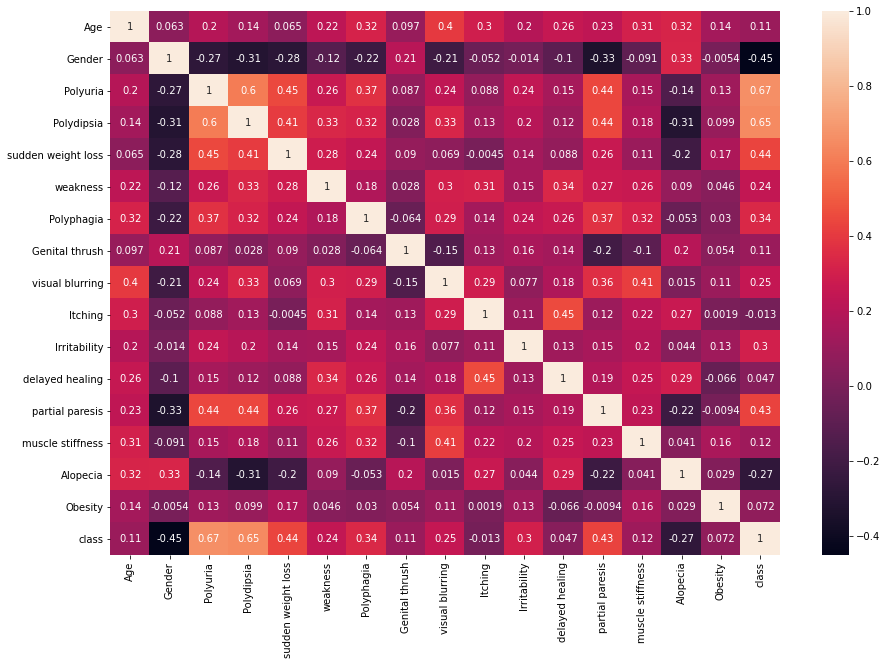

In [92]:
ax,fig=plt.subplots(figsize=(15,10))
sns.heatmap(corrdata,annot=True)

In [93]:
# Polyuria is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.



In [94]:
dia_df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
dia_df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [96]:
X=dia_df[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
y=dia_df['class']

In [97]:
X_train, X_test  , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [98]:
X_train.shape


(416, 16)

In [99]:
X_test.shape

(104, 16)

In [100]:
y_train.shape

(416,)

In [101]:
y_test.shape

(104,)

In [102]:
#knn,nb,svm,dtm

## Decision Tree

In [22]:
classifier=tree.DecisionTreeClassifier()
dt_grid={'max_depth':[3,4,5,6,7],'criterion':['gini','entropy']}
grid_classifier=model_selection.GridSearchCV(classifier,dt_grid,cv=10,refit=True,return_train_score=True)
grid_classifier.fit(X_train,y_train)
results=grid_classifier.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('best_train_score'))
print(grid_classifier.best_params_)
print(grid_classifier.best_score_)
final_model = grid_classifier.best_estimator_
print(grid_classifier.best_estimator_)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': 6}, {'criterion': 'gini', 'max_depth': 7}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 6}, {'criterion': 'entropy', 'max_depth': 7}]
[0.91109175 0.88699187 0.90627178 0.9470964  0.94721254 0.89657375
 0.89674797 0.94953542 0.94233449 0.94245064]
None
{'criterion': 'entropy', 'max_depth': 5}
0.9495354239256677
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [23]:

X_train, X_test  , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)
dtc = tree.DecisionTreeClassifier(max_depth=7,criterion='gini' ,random_state=0)
dtc = dtc.fit(X_train,y_train)
print("Accuracy on training set: {:.3f} ".format(dtc.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(dtc.score(X_test,y_test)))

from sklearn.model_selection import cross_val_score
dtc_ac=cross_val_score(estimator=dtc,X=X_train,y=y_train,cv=10)
print(dtc_ac.mean())

Accuracy on training set: 0.995 
Accuracy on test set: 0.981
0.9471544715447155


In [24]:
pred_dtc=dtc.predict(X_test)

In [25]:
print("Accuracy score: ",accuracy_score(pred_dtc,y_test))

Accuracy score:  0.9807692307692307


In [26]:
cm=confusion_matrix(pred_dtc,y_test)
print(cm)

[[30  1]
 [ 1 72]]


In [27]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.99      0.99      0.99        73

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



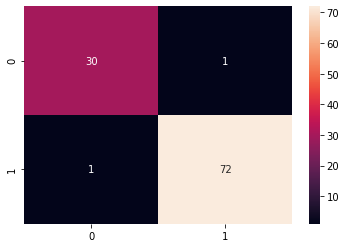

In [28]:
sns.heatmap(cm,annot=True)

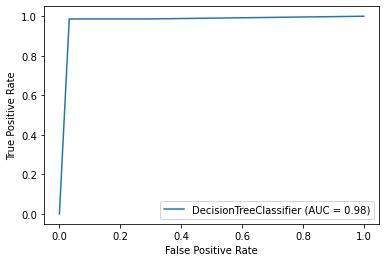

In [29]:
from sklearn import metrics
metrics.plot_roc_curve(dtc,X_test,y_test)

In [30]:
print(roc_auc_score(y_test,pred_dtc))

0.9770216526734423


## svm

In [31]:
svm_model = svm.SVC().fit(X_train, y_train)

print("Accuracy on training set: {:.3f} ".format(svm_model.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(svm_model.score(X_test,y_test)))

Accuracy on training set: 0.594 
Accuracy on test set: 0.702


In [32]:
pred_svm=svm_model.predict(X_test)
print("Accuracy score: ",accuracy_score(pred_svm,y_test))

Accuracy score:  0.7019230769230769


In [33]:
from sklearn.model_selection import KFold,GridSearchCV
num_folds=10
c_values=[0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0,]
kernel_values=['linear','poly','rbf','sigmoid']
#penalty_values=['l1','l2']  ,penalty=penalty_values
#loss_values=['hinge','squared_hinge']   ,loss=loss_values
#class_weight_val=['dict','balanced',None]  ,class_weight=class_weight_val
param_grid=dict(C=c_values,kernel=kernel_values)
#svm_model=SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result=grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.935192 using {'C': 1.7, 'kernel': 'linear'}
0.923055 (0.045225) with: {'C': 0.1, 'kernel': 'linear'}
0.593786 (0.076574) with: {'C': 0.1, 'kernel': 'poly'}
0.593786 (0.076574) with: {'C': 0.1, 'kernel': 'rbf'}
0.593786 (0.076574) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.927875 (0.023942) with: {'C': 0.3, 'kernel': 'linear'}
0.593786 (0.076574) with: {'C': 0.3, 'kernel': 'poly'}
0.593786 (0.076574) with: {'C': 0.3, 'kernel': 'rbf'}
0.598606 (0.073066) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.927933 (0.037197) with: {'C': 0.7, 'kernel': 'linear'}
0.593786 (0.076574) with: {'C': 0.7, 'kernel': 'poly'}
0.593786 (0.076574) with: {'C': 0.7, 'kernel': 'rbf'}
0.599129 (0.087507) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.927933 (0.037197) with: {'C': 0.9, 'kernel': 'linear'}
0.593786 (0.076574) with: {'C': 0.9, 'kernel': 'poly'}
0.593786 (0.076574) with: {'C': 0.9, 'kernel': 'rbf'}
0.601103 (0.088117) with: {'C': 0.9, 'kernel': 'sigmoid'}
0.930372 (0.036233) with: {'C': 1.0, 'kernel': 'line

In [34]:
svm_m=svm.SVC(kernel='rbf',C=1.7,gamma=0.4)
svm_m.fit(X_train, y_train)
print("Accuracy on training set: {:.3f} ".format(svm_m.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(svm_m.score(X_test,y_test)))

Accuracy on training set: 1.000 
Accuracy on test set: 0.981


In [35]:
pred_svm=svm_m.predict(X_test)
print("Accuracy score: ",accuracy_score(pred_svm,y_test))

Accuracy score:  0.9807692307692307


In [36]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.99      0.99      0.99        73

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



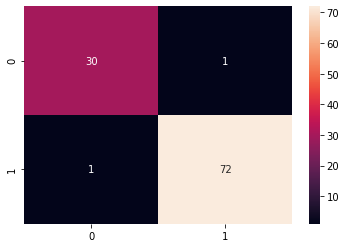

In [37]:
cm_svm=confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm,annot=True)

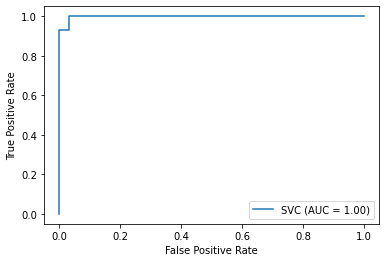

In [38]:
#ROC AUC
from sklearn import metrics
metrics.plot_roc_curve(svm_m,X_test,y_test)

In [39]:
print(roc_auc_score(y_test,pred_svm))

0.9770216526734423


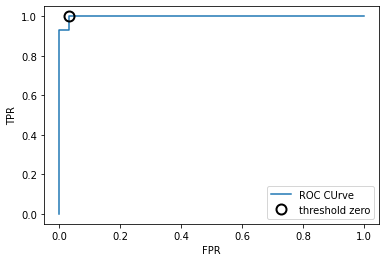

In [40]:
fpr,tpr,thresholds=roc_curve(y_test,svm_m.decision_function(X_test))
plt.plot(fpr,tpr,label="ROC CUrve")
plt.xlabel("FPR")
plt.ylabel("TPR")
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.legend(loc="best")

## NB

In [41]:
np.random.seed(999)
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB,  cv=10,  verbose=2,  scoring='accuracy')


In [42]:
gs_NB.fit(X_train, y_train)

_smoothing=1.873817422860383e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoothing=1.519911082952933e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoothing=1.519911082952933e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoothing=1.519911082952933e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoothing=1.519911082952933e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoothing=1.519911082952933e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoothing=1.519911082952933e-08, total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV] .............. var_smoot

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [43]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=2.848035868435799e-05)

In [44]:
gs_NB.best_params_

{'var_smoothing': 2.848035868435799e-05}

In [45]:
gs_NB.best_score_

0.906329849012776

In [46]:
results_GNB = pd.DataFrame(gs_NB.cv_results_['params'])
results_GNB['test_score'] = gs_NB.cv_results_['mean_test_score']

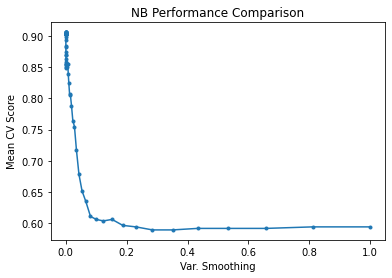

In [47]:
plt.plot(results_GNB['var_smoothing'], results_GNB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [48]:
gnb = GaussianNB(var_smoothing=2.848035868435799e-05)
gnb = gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test,gnb_pred))

0.9038461538461539


In [49]:
print("Accuracy on training set: {:.3f} ".format(gnb.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gnb.score(X_test,y_test)))

Accuracy on training set: 0.911 
Accuracy on test set: 0.904


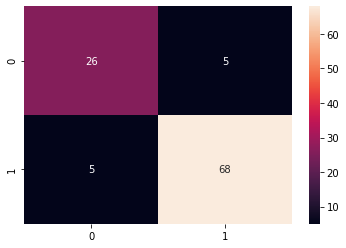

In [50]:
cm_gnb=confusion_matrix(y_test, gnb_pred)
sns.heatmap(cm_gnb,annot=True)

In [51]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.93      0.93      0.93        73

    accuracy                           0.90       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.90      0.90      0.90       104



In [52]:
print(roc_auc_score(y_test,gnb_pred))

0.8851082633672116


### multinomial NB

In [53]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb = mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print(accuracy_score(y_test,mnb_pred))

0.9038461538461539


In [54]:
print("Accuracy on training set: {:.3f} ".format(mnb.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(mnb.score(X_test,y_test)))

Accuracy on training set: 0.892 
Accuracy on test set: 0.904


In [55]:
print(classification_report(y_test,mnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.93      0.93      0.93        73

    accuracy                           0.90       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.90      0.90      0.90       104



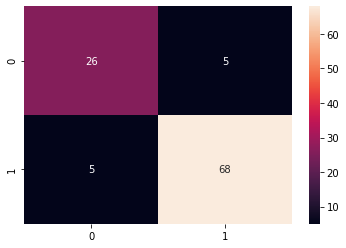

In [56]:
cm_mnb=confusion_matrix(y_test, mnb_pred)
sns.heatmap(cm_mnb,annot=True)

### bernoulli NB

In [57]:
from sklearn.naive_bayes import BernoulliNB

In [58]:
bnb = BernoulliNB(alpha=0.0)
bnb = bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
print(accuracy_score(y_test,bnb_pred))

0.8653846153846154


In [59]:
nb_classifier1 = BernoulliNB()

params_NB1 = {'alpha': np.linspace(0,1, num=20)}

gs_NB1 = GridSearchCV(estimator=nb_classifier1, param_grid= params_NB1 ,cv=10,  verbose=1,  scoring='accuracy')

gs_NB1.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy', verbose=1)

In [60]:
gs_NB1.best_params_

{'alpha': 0.0}

In [61]:
gs_NB1.best_score_

0.8847851335656213

In [62]:
from sklearn.naive_bayes import CategoricalNB

In [63]:
cnb = CategoricalNB()
cnb = cnb.fit(X_train,y_train)
cnb_pred = cnb.predict(X_test)
print(accuracy_score(y_test,cnb_pred))

0.8942307692307693


In [64]:
print("Accuracy on training set: {:.3f} ".format(cnb.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(cnb.score(X_test,y_test)))

Accuracy on training set: 0.904 
Accuracy on test set: 0.894


In [65]:
print(classification_report(y_test,cnb_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.97      0.88      0.92        73

    accuracy                           0.89       104
   macro avg       0.87      0.91      0.88       104
weighted avg       0.91      0.89      0.90       104



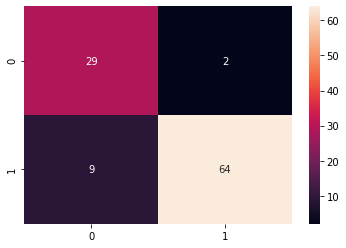

In [66]:
cm_cnb=confusion_matrix(y_test, cnb_pred)
sns.heatmap(cm_cnb,annot=True)

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier().fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(rfc_pred, y_test))

0.9807692307692307


In [69]:
print("Accuracy on training set: {:.3f} ".format(rfc.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test,y_test)))

Accuracy on training set: 1.000 
Accuracy on test set: 0.981


In [70]:
param_grid = { 
    'n_estimators': [100,200,250,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [72]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10 )
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [92]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [93]:
CV_rfc.best_score_

0.9807200929152149

In [94]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [90]:
param_grid = { 
    'n_estimators': [100,200,250,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
grid_classifier1=model_selection.GridSearchCV(rfc,param_grid,cv=10,refit=True,return_train_score=True)
grid_classifier1.fit(X_train,y_train)
results=grid_classifier1.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('best_train_score'))
print(grid_classifier1.best_params_)
print(grid_classifier1.best_score_)
final_model = grid_classifier1.best_estimator_
print(grid_classifier1.best_estimator_)

[{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 250}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 250}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 250}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators

In [46]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=8,max_features='auto',criterion='gini').fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(rfc_pred, y_test))

0.9807692307692307


In [47]:
print("Accuracy on training set: {:.3f} ".format(rfc.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test,y_test)))

Accuracy on training set: 1.000 
Accuracy on test set: 0.981


In [48]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.99      0.99      0.99        73

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



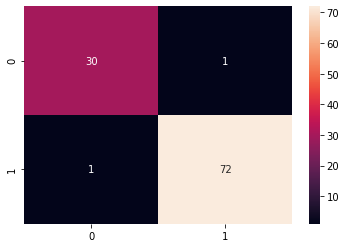

In [50]:
cm_rfc=confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm_rfc,annot=True)

In [64]:
print(roc_auc_score(y_test,rfc_pred))

0.9770216526734423


## log reg


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lg = LogisticRegression().fit(X_train, y_train)
lg_pred = lg.predict(X_test)
print(accuracy_score(lg_pred, y_test))

0.8942307692307693


In [69]:
print("Accuracy on training set: {:.3f} ".format(lg.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(lg.score(X_test,y_test)))

Accuracy on training set: 0.942 
Accuracy on test set: 0.894


In [70]:
from sklearn.model_selection import cross_val_score
lg_ac=cross_val_score(estimator=lg,X=X_train,y=y_train,cv=10)
print(lg_ac.mean())

0.9303716608594657


In [71]:
param_grid = { 
     'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'C':[0.7,1.0,1.2,1.4,1.6,1.8,2.0]
}

In [72]:
CV_lg = GridSearchCV(estimator=lg, param_grid=param_grid, cv=10 )
CV_lg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.7, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [73]:
CV_lg.best_params_

{'C': 0.7, 'multi_class': 'auto', 'solver': 'newton-cg'}

In [74]:
CV_lg.best_score_

0.9303716608594657

In [86]:
CV_lg.best_estimator_

LogisticRegression(C=0.7, solver='newton-cg')

In [88]:
lg_m=LogisticRegression(C=0.7,solver='newton-cg')
lg_m.fit(X_train, y_train)
print("Accuracy on training set: {:.3f} ".format(lg_m.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(lg_m.score(X_test,y_test)))

Accuracy on training set: 0.942 
Accuracy on test set: 0.894


In [81]:
pred_lg=lg_m.predict(X_test)
print("Accuracy score: ",accuracy_score(pred_lg,y_test))

Accuracy score:  0.8942307692307693


In [82]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.94      0.90      0.92        73

    accuracy                           0.89       104
   macro avg       0.87      0.89      0.88       104
weighted avg       0.90      0.89      0.90       104



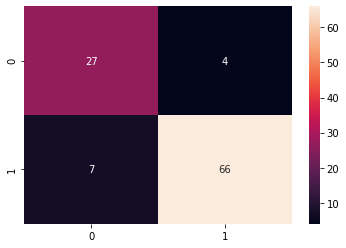

In [78]:
cm_lg=confusion_matrix(y_test, pred_lg)
sns.heatmap(cm_lg,annot=True)

In [79]:
print(roc_auc_score(y_test,pred_lg))

0.88753866548829


## knn

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [153]:
param_grid_knn = { 
    'n_neighbors': [2,3,5,7,9,11],
    'weights': ['uniform','distance'],
    'metric' : ['euclidean','manhattan'],
}

In [154]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=10 )
CV_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [155]:
print(CV_knn.best_params_)
print(CV_knn.best_estimator_)
print(CV_knn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
0.9255516840882695


In [177]:
knn_m=KNeighborsClassifier(n_neighbors=4,metric='manhattan',weights='distance')
knn_m.fit(X_train, y_train)
print("Accuracy on training set: {:.3f} ".format(knn_m.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(knn_m.score(X_test,y_test)))

Accuracy on training set: 1.000 
Accuracy on test set: 0.942


In [178]:
pred_knn=knn_m.predict(X_test)
print("Accuracy score: ",accuracy_score(pred_knn,y_test))

Accuracy score:  0.9423076923076923


In [179]:
print(roc_auc_score(y_test,pred_knn))

0.9496243923994697


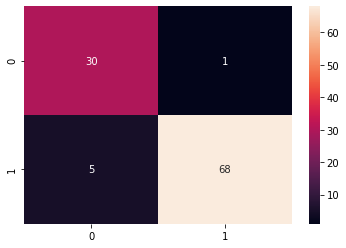

In [180]:
cm_knn=confusion_matrix(y_test, pred_knn)
sns.heatmap(cm_knn,annot=True)

## Comparison

In [107]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve,roc_auc_score
from sklearn import tree, model_selection, svm
from sklearn.linear_model import LogisticRegression
import time

In [328]:
algo_list = []
algo_list.append(('KNN', KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance')))
algo_list.append(('LG', LogisticRegression(C=1.7)))
algo_list.append(('SVM', svm.SVC(kernel='rbf',C=1.7,gamma=0.4)))
algo_list.append(('NB', GaussianNB(var_smoothing=2.848035868435799e-05)))
algo_list.append(('DT', DecisionTreeClassifier(max_depth=7,criterion='gini' ,random_state=0)))
algo_list.append(('RF', RandomForestClassifier(n_estimators=100,max_depth=13)))
algo_list.append(('MLP', MLPClassifier(hidden_layer_sizes=100,activation='logistic',learning_rate='adaptive',learning_rate_init=0.01,solver='adam',max_iter=200, n_iter_no_change= 60)))
num_folds = 10
r_s = 21
results = []
names = []

In [329]:
for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=r_s)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.925494 (0.043544) (run time: 0.086803)
LG: 0.925436 (0.037830) (run time: 0.426820)
SVM: 0.944715 (0.044613) (run time: 0.133642)
NB: 0.906388 (0.049674) (run time: 0.069853)
DT: 0.942276 (0.016159) (run time: 0.055813)
RF: 0.975958 (0.021429) (run time: 1.589778)
MLP: 0.954413 (0.026975) (run time: 4.128917)


In [330]:
for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=r_s)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.959724 (0.030100) (run time: 0.104720)
LG: 0.977940 (0.017211) (run time: 0.396936)
SVM: 0.986695 (0.014572) (run time: 0.122672)
NB: 0.953770 (0.031843) (run time: 0.073804)
DT: 0.944544 (0.018233) (run time: 0.062872)
RF: 0.997103 (0.004382) (run time: 1.501990)
MLP: 0.991602 (0.010889) (run time: 4.547792)


In [331]:
for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=r_s)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.933702 (0.039217) (run time: 0.088761)
LG: 0.935919 (0.036216) (run time: 0.402924)
SVM: 0.952918 (0.039842) (run time: 0.126659)
NB: 0.920622 (0.043452) (run time: 0.073811)
DT: 0.950346 (0.014900) (run time: 0.065818)
RF: 0.981504 (0.017107) (run time: 1.529945)
MLP: 0.957047 (0.028381) (run time: 4.115955)


In [198]:
from sklearn.neural_network import MLPClassifier

In [199]:
mlp= MLPClassifier()

In [203]:
param_grid_mlp = { 
    'hidden_layer_sizes': [1,2,3],
    'activation': ['relu','logistic','tanh'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' :['constant', 'invscaling', 'adaptive'],
    'max_iter': [100,200,500]}

In [204]:
CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=10 )
CV_mlp.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [1, 2, 3],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 200, 500],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [205]:
print(CV_mlp.best_params_)
print(CV_mlp.best_estimator_)
print(CV_mlp.best_score_)

{'activation': 'logistic', 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
MLPClassifier(activation='logistic', hidden_layer_sizes=3,
              learning_rate='adaptive', max_iter=500)
0.9157955865272939


In [332]:
mlp_m=MLPClassifier(hidden_layer_sizes=100,activation='logistic',learning_rate='adaptive',learning_rate_init=0.01,solver='adam',max_iter=200, n_iter_no_change= 60)
mlp_m.fit(X_train, y_train)
print("Accuracy on training set: {:.3f} ".format(knn_m.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(knn_m.score(X_test,y_test)))

Accuracy on training set: 1.000 
Accuracy on test set: 0.942


In [335]:
pred_mlp=mlp_m.predict(X_test)
print("Accuracy score: ",accuracy_score(pred_mlp,y_test))

Accuracy score:  0.9615384615384616


In [337]:
print(roc_auc_score(y_test,pred_mlp))

0.963323022536456


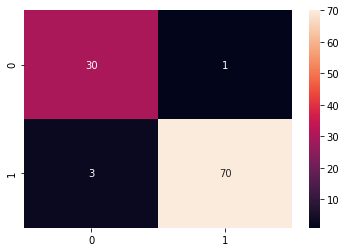

In [338]:
cm_mlp=confusion_matrix(y_test, pred_mlp)
sns.heatmap(cm_mlp,annot=True)